<a href="https://colab.research.google.com/github/bhardwaj0027/Deep-Learning-CSL312/blob/main/Experiment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
235/235 [==============================] - 21s 88ms/step - loss: 0.5515 - accuracy: 0.8094 - val_loss: 0.3913 - val_accuracy: 0.8622
Epoch 2/5
235/235 [==============================] - 21s 88ms/step - loss: 0.3406 - accuracy: 0.8809 - val_loss: 0.3412 - val_accuracy: 0.8752
Epoch 3/5
235/235 [==============================] - 23s 97ms/step - loss: 0.2960 - accuracy: 0.8950 - val_loss: 0.3128 - val_accuracy: 0.8868
Epoch 4/5
235/235 [==============================] - 21s 91ms/step - loss: 0.2696 - accuracy: 0.9042 - val_loss: 0.2960 - val_accuracy: 0.8943
Epoch 5/5
235/235 [==============================] - 21s 88ms/step - loss: 0.2496 - accuracy: 0.9110 - val_loss: 0.2844 - val_accuracy: 0.8989


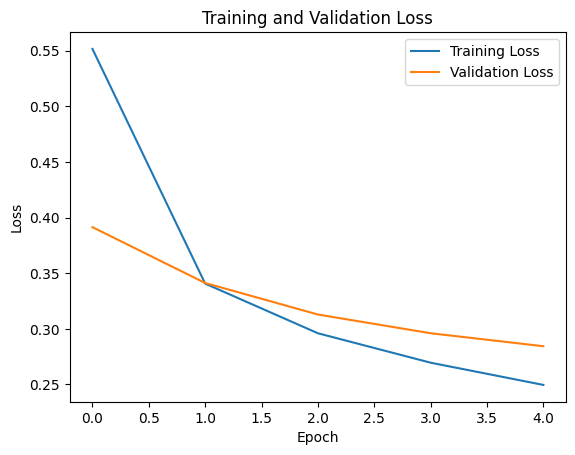

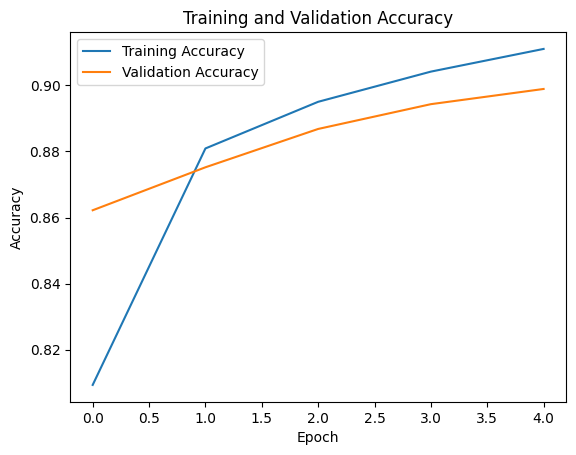

313/313 [==============================] - 1s 4ms/step - loss: 0.2844 - accuracy: 0.8989
Test accuracy: 0.8988999724388123
313/313 [==============================] - 1s 4ms/step


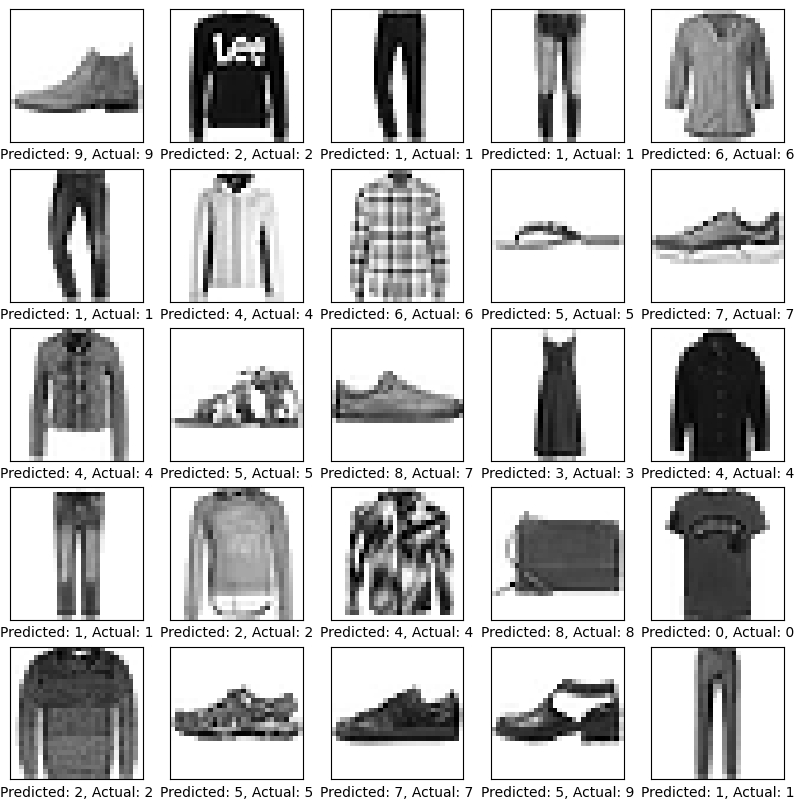

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(np.expand_dims(x_train, axis=-1), y_train, epochs=5, batch_size = 512, validation_data=(np.expand_dims(x_test, axis=-1), y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(np.expand_dims(x_test, axis=-1), y_test)
print(f"Test accuracy: {test_acc}")

# Make predictions
predictions = model.predict(np.expand_dims(x_test, axis=-1))

# Plot some sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
plt.show()
